# Taller 3: Segmentación

## Cargue la imagen de trabajo y visualícela.

In [28]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_chest = cv2.imread(PATH +'CHEST.png', cv2.IMREAD_GRAYSCALE)

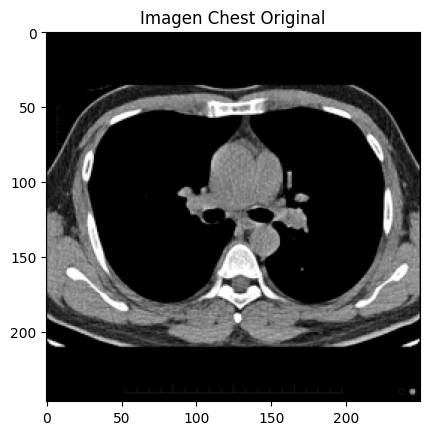

In [30]:
plt.imshow(imagen_chest, cmap='gray')
plt.title('Imagen Chest Original')
plt.show()

## Manualmente, usando paint, cree una máscara asociada al área oscura que corresponde a los pulmones, tratando de respetar la región de la manera más precisa posible.

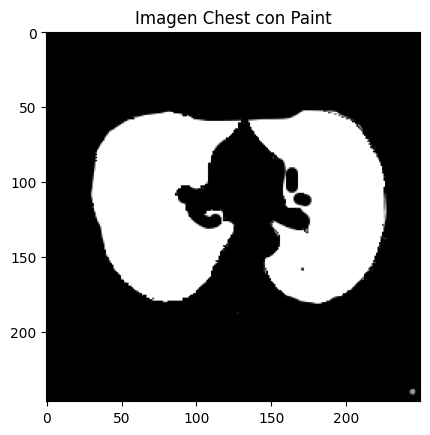

In [31]:
imagen_chest_paint = cv2.imread(PATH +'CHEST_paint.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen_chest_paint, cmap='gray')
plt.title('Imagen Chest con Paint')
plt.show()

## Usando ahora dos semillas, utilice el algoritmo de crecimiento de regiones para segmentar de forma automática el área de los pulmones. Pruebe con varios valores de tolerancia.

Visualizamos el punto de inicio (semillas) escogidos para el algoritmo de crecimiento de regiones y el resultado de la segmentación. Unimos ambas segmentaciones con un OR lógico para los bits.

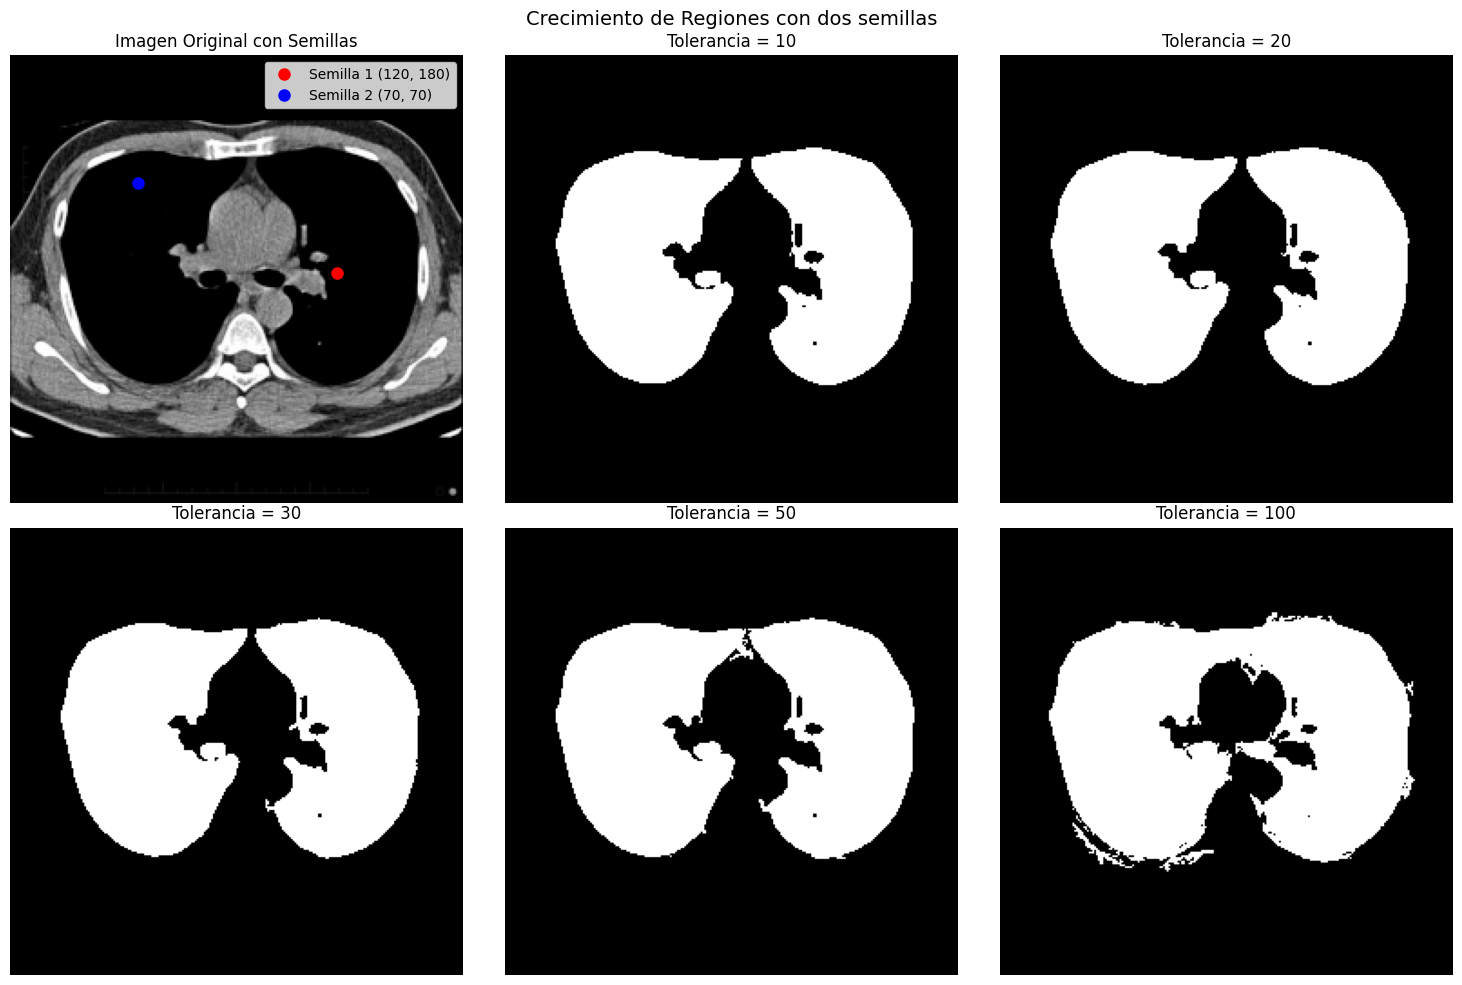

In [32]:
from skimage.segmentation import flood

seed1 = (120, 180)
seed2 = (70, 70)

# Diferentes valores de tolerancia
tolerancias = [10, 20, 30, 50, 100]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Mostrar imagen original con las semillas marcadas
axs[0].imshow(imagen_chest, cmap='gray')
axs[0].plot(seed1[1], seed1[0], 'ro', markersize=8, label=f'Semilla 1 {seed1}')
axs[0].plot(seed2[1], seed2[0], 'bo', markersize=8, label=f'Semilla 2 {seed2}')
axs[0].set_title('Imagen Original con Semillas')
axs[0].legend()
axs[0].axis('off')

for i, tol in enumerate(tolerancias):

    region1 = flood(imagen_chest, seed1, tolerance=tol)
    region2 = flood(imagen_chest, seed2, tolerance=tol)
    
    # Unir ambas regiones
    segmentacion = (region1 | region2).astype(np.uint8) * 255
    
    axs[i + 1].imshow(segmentacion, cmap='gray')
    axs[i + 1].set_title(f'Tolerancia = {tol}')
    axs[i + 1].axis('off')

plt.suptitle('Crecimiento de Regiones con dos semillas', fontsize=14)
plt.tight_layout()
plt.show()

Colocamos ambas semillas en puntos correspondientes a cada pulmón. El parámetro de tolerancia controla la diferencia máxima de intensidad que un píxel puede tener respecto a la semilla para ser incluido en la región. Las tolerancia no cambian mucho el resultado por el punto de las semillas escogidas y los bordes de estas regiones que son grises mucho más claros. En tolerancia con valor de 100 si hay un cambio y es que la segmentación empieza a exceder los bordes.

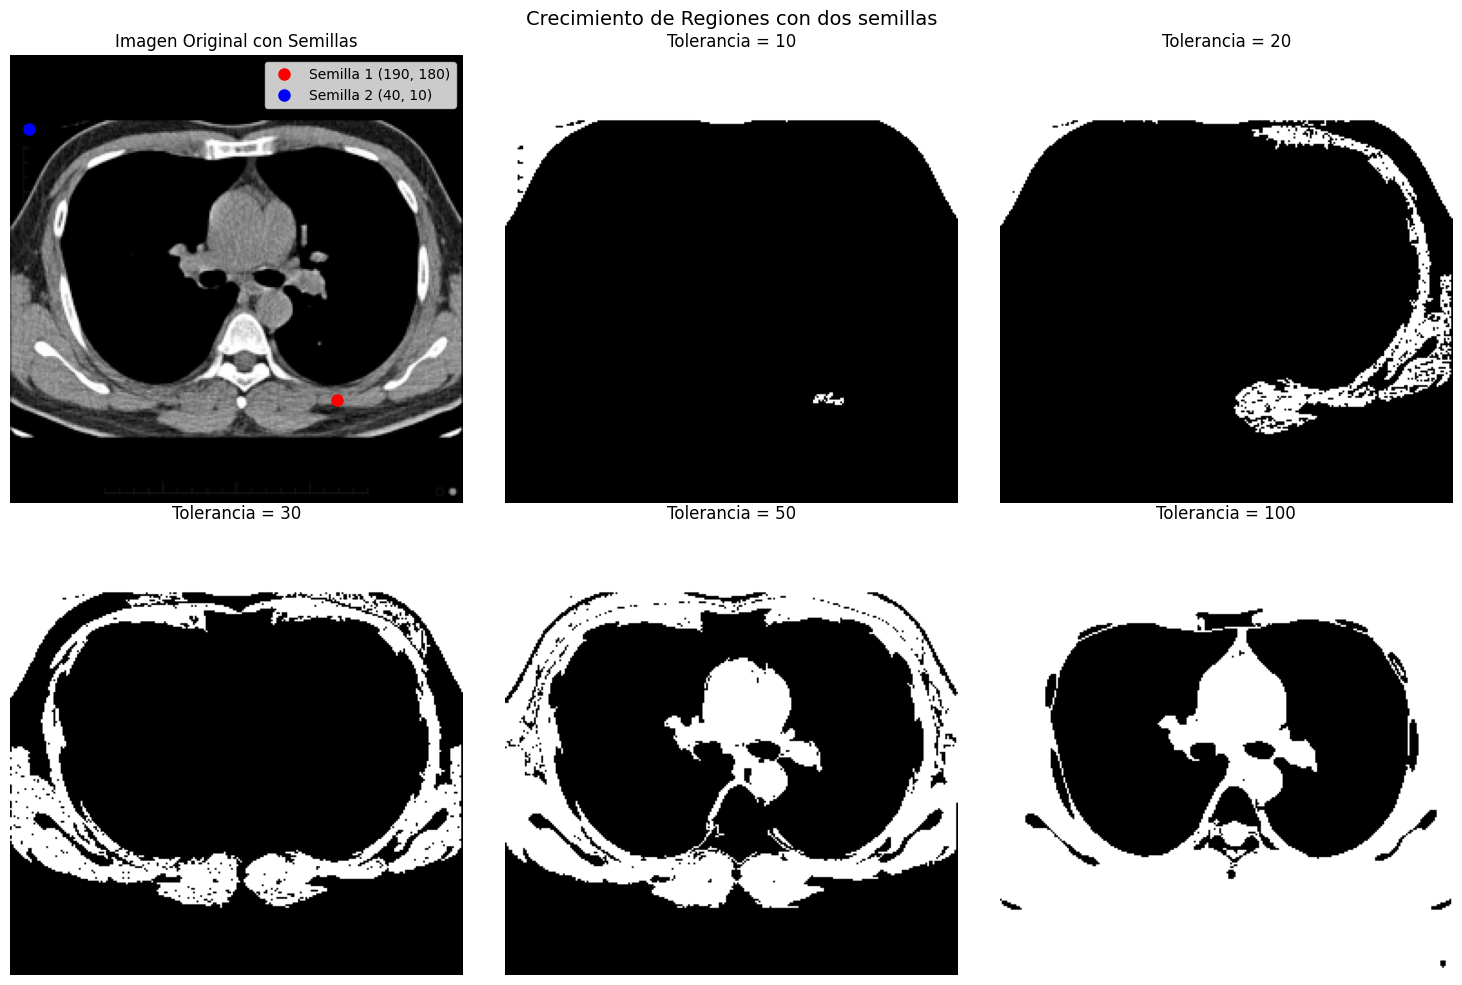

In [33]:
seed1 = (190, 180)
seed2 = (40, 10)

# Diferentes valores de tolerancia
tolerancias = [10, 20, 30, 50, 100]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Mostrar imagen original con las semillas marcadas
axs[0].imshow(imagen_chest, cmap='gray')
axs[0].plot(seed1[1], seed1[0], 'ro', markersize=8, label=f'Semilla 1 {seed1}')
axs[0].plot(seed2[1], seed2[0], 'bo', markersize=8, label=f'Semilla 2 {seed2}')
axs[0].set_title('Imagen Original con Semillas')
axs[0].legend()
axs[0].axis('off')

for i, tol in enumerate(tolerancias):

    region1 = flood(imagen_chest, seed1, tolerance=tol)
    region2 = flood(imagen_chest, seed2, tolerance=tol)
    
    # Unir ambas regiones
    segmentacion = (region1 | region2).astype(np.uint8) * 255
    
    axs[i + 1].imshow(segmentacion, cmap='gray')
    axs[i + 1].set_title(f'Tolerancia = {tol}')
    axs[i + 1].axis('off')

plt.suptitle('Crecimiento de Regiones con dos semillas', fontsize=14)
plt.tight_layout()
plt.show()

Si cambiamos las semillas, el resultado no separa claramente los pulmones del resto de la imagen y se nota mejor la influencia de la tolerancia. En este caso, mayores niveles de tolerancia dan mejores resultados.

## Compare ambos resultados. ¿Cómo se puede determinar cualitativamente dos regiones? ¿Cuál segmentación tiene mejor calidad?

Teniendo en cuenta la segmentación con paint (manual) y con el algoritmo de crecimiento de regiones, dos regiones se pueden determinar por sus bordes, es decir, cambios drásticos en la intensidad. Comparando ambos resultados, la segmentación por crecimiento de regiones con semillas bien ubicadas y tolerancia adecuada produce una mejor calidad a la máscara manual. Una máscara manual puede ser mejor en manos de un experto que conoce las formas anatómicas de los pulmones. Finalmente, si se escogen semillas que no están dentro de la región, es difícil lograr un mejor resultado comparado con la segmentación manual.

## Investigue el coeficiente de Sorensen-Dice. Esta es una medida de la similitud entre dos áreas segmentadas. Aplíquelo sobre las segmentaciones del punto 3 y 4. ¿Cómo puede interpretar el resultado? ¿Respalda el análisis cualitativo el valor obtenido?

**Coeficiente de Sorensen-Dice:** es una medida de similitud entre dos conjuntos que cuantifica el grado de superposición entre ellos. Se define como el doble del área de intersección dividido entre la suma de las áreas individuales. Su valor varía entre 0 y 1, donde 0 indica que no hay superposición alguna entre las regiones y 1 indica que son idénticas.

In [34]:
import numpy as np

seed1 = (120, 180)
seed2 = (70, 70)
tolerancia = 20
region1 = flood(imagen_chest, seed1, tolerance=tolerancia)
region2 = flood(imagen_chest, seed2, tolerance=tolerancia)
mascara_total = (region1 | region2).astype(np.uint8) * 255


# Asegurar que sean booleanas
A = mascara_total.astype(bool)
B = imagen_chest_paint.astype(bool)

# Intersección
interseccion = np.logical_and(A, B).sum()

# Tamaños
size_A = A.sum()
size_B = B.sum()

# Dice
dice = (2 * interseccion) / (size_A + size_B)

print("Coeficiente Dice:", dice)

Coeficiente Dice: 0.9658831549930343


El coeficiente de Dice obtenido indica una superposición del 96.6% entre la segmentación por crecimiento de regiones y la máscara manual hecha en Paint. Este valor respalda el análisis cualitativo realizado anteriormente: con semillas bien ubicadas dentro de los pulmones y una tolerancia adecuada, el algoritmo de crecimiento de regiones produce una segmentación muy cercana a la referencia manual. La pequeña diferencia del 3.4% se puede ser por imprecisiones en el trazado manual de los bordes en Paint, ya que el algoritmo sigue de manera más precisa los cambios de intensidad en los bordes de los pulmones.